<a href="https://colab.research.google.com/github/osienka/uczenie-maszynowe/blob/main/Copy_of_04M_Bayes_irysy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naiwny klasyfikator Bayesa
Autor: Jarosław Żygierewicz

Rozwiązanie: Zofia Hendrysiak

Z klasyfikatorem tym zapoznamy się próbując klasyfikować gatunki irysów. Jest to klasyczny już problem, często wykorzystywany przy porównywaniu różnych technik klasyfikacji. Więcej o pochodzeniu tych danych i problemie można przeczytać tu: [Iris_flower_data](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Kod napiszemy w oparciu o implementacje klasyfikatora Bayesa z biblioteki [scikit-learn](http://scikit-learn.org/stable/about.html#citing-scikit-learn)

Zaczerpniemy stamtąd:
* obiekt klasyfikatora [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html),
* zbiór danych,
* funkcje do oceny jakości.

Przygotowanie środowiska: import wymaganych pakietów.

In [ ]:
import matplotlib
import numpy as np

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

## Zbiór danych irys
Zapoznajemy się z danymi i wybieramy ich podzbiór do dalszej zabawy. Dane to standardowy zestaw dostępny w bibliotece sklearn.

In [ ]:
#Wczytywanie danych
iris = datasets.load_iris() #https://en.wikipedia.org/wiki/Iris_flower_data_set

#Wypisywanie zawartości wczytanego obiektu
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


Proszę zobaczyć co zawierają dane. Proszę wypisać:

* nazwy gatunków,
* kodowanie gatunków, czyli liczby przypisane do nazw gatunków "target",
* nazwy zmiennych oppisujących gatunki "feature_names",
* opis danych "DESCR".

In [ ]:
print(iris["target_names"])
print(iris["target"])
print(iris["feature_names"])
print(iris["DESCR"])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ======

Proszę utworzyć obiekt DataFrame zawierający własności ("features"):
* proszę przypisać poprawne nazwy kolumn: ```columns=iris.feature_name```,
* proszę dodać do obiektu DataFrame kolumnę etykiet,
* proszę wypisać zawartość obiektu DataFrame.

In [ ]:
df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
df["label"] = iris["target"]
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  label
0                  5.1               3.5  ...               0.2      0
1                  4.9               3.0  ...               0.2      0
2                  4.7               3.2  ...               0.2      0
3                  4.6               3.1  ...               0.2      0
4                  5.0               3.6  ...               0.2      0
..                 ...               ...  ...               ...    ...
145                6.7               3.0  ...               2.3      2
146                6.3               2.5  ...               1.9      2
147                6.5               3.0  ...               2.0      2
148                6.2               3.4  ...               2.3      2
149                5.9               3.0  ...               1.8      2

[150 rows x 5 columns]


Proszę wypisać własności przykładu o indeksie 5. 

* proszę skorzystać z funkcji DataFrame.loc(index)

Wynik powinien być następujący:
```
sepal length (cm)    5.4
sepal width (cm)     3.9
petal length (cm)    1.7
petal width (cm)     0.4
label                0.0
Name: 5, dtype: float64
```

In [ ]:
print(df.loc[5])

sepal length (cm)    5.4
sepal width (cm)     3.9
petal length (cm)    1.7
petal width (cm)     0.4
label                0.0
Name: 5, dtype: float64


Proszę sprawdzić jaki gatunek odpowiada wartości etykiety przykładu o indeksie 5.
Wynik powinien być następujący:
```
setosa
```

In [ ]:
print(iris['target_names'][int((df.loc[5])['label'])])

setosa


## Analiza wizualna danych 

Pierwszy krok przy analizie danych z użyciem dowolnego algorytmu to ich inspekcja. Korzystając z metod klasy `DataFrame` proszę:
* narysować rozkłady wszystkich zmiennych wejściowych.

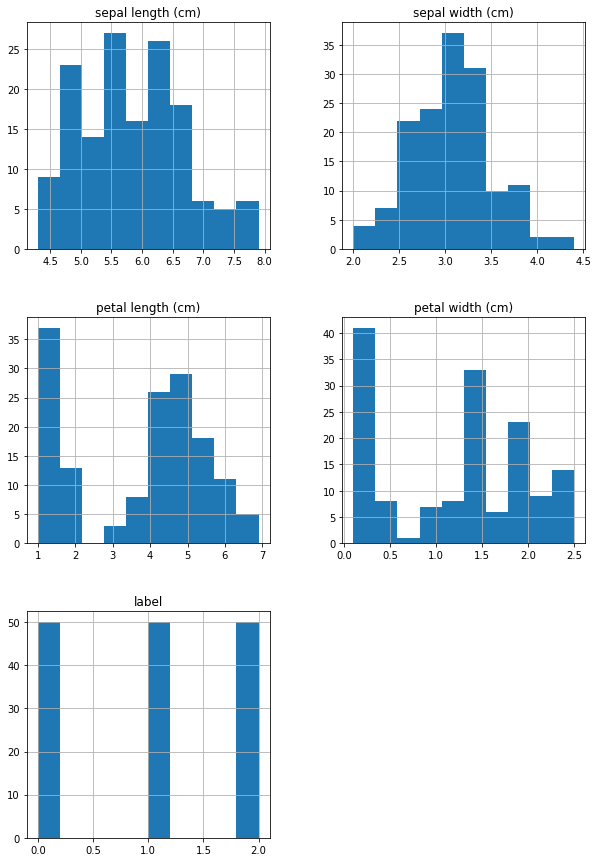

In [ ]:
df.hist(figsize=(10,15));

Naszym zadaniem jest rozdzielenie gatunków na podstawie wartości własności: 

* proszę narysować rozkłady (histogramy) własności w podziale na  gatunki. Rysując histogramy proszę dobrać zakresy przedziałów na podstawie histogramów narysowanych bez podziału na gatunki,
* na podstawie histogramów proszę zidentyfikować cechy, które najlepiej odróżniają gatunki.

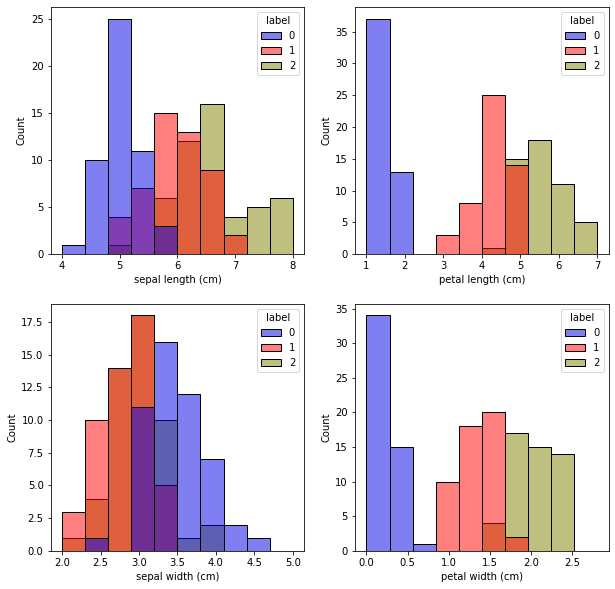

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.5, .5, 0)}

sns.histplot(data=df, x="sepal length (cm)", hue="label", binrange=(4,8),palette=color_map, bins=10, ax=axes[0,0]);
sns.histplot(data=df, x="sepal width (cm)", hue="label", binrange=(2,5),palette=color_map, bins=10, ax=axes[1,0]);
sns.histplot(data=df, x="petal length (cm)", hue="label", binrange=(1,7),palette=color_map, bins=10, ax=axes[0,1]);
sns.histplot(data=df, x="petal width (cm)", hue="label", binrange=(0,2.8),palette=color_map, bins=10, ax=axes[1,1]);

## Wykres skrzypcowy ("violin plot")

Histogramy dla poszczególnych gatunków się nakładają częściowo. Inny sposób wizualizacji to wykres skrzypcowy:

* proszę narysować wykresy skrzypcowe dla poszczególnych cech z podziałem na gatunki,
* na podstawie rysunków proszę zidentyfikować cechy, które najlepiej odróżniają gatunki.

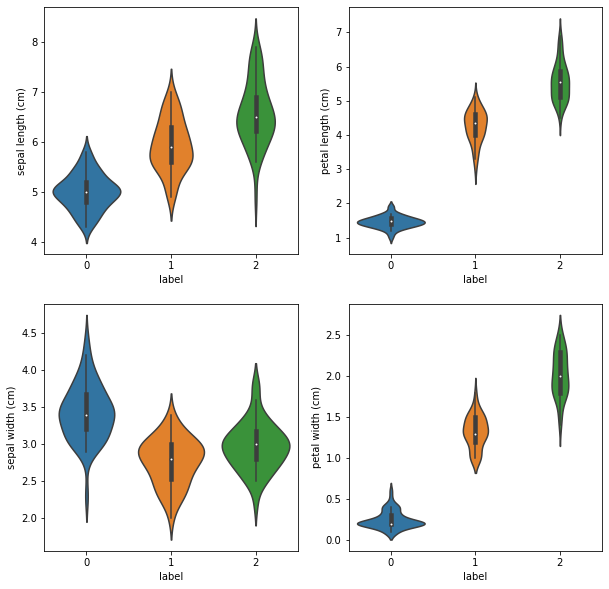

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

sns.violinplot(data=df, x="label", y="sepal length (cm)",ax=axes[0,0]); 
sns.violinplot(data=df, x="label", y="sepal width (cm)",ax=axes[1,0]); 
sns.violinplot(data=df, x="label", y="petal length (cm)",ax=axes[0,1]); 
sns.violinplot(data=df, x="label", y="petal width (cm)",ax=axes[1,1]); 

## Analiza dwuwymiarowa

Rysunki narysowane do tej pory były jednowymiarowe. Kolejny krok to wizualna analiza korelacji między cechami.

* proszę obliczyć macierz kowariancji między wszystkimi kolumnami danych włączając etykietym,
* proszę narysować macierz kowariancji.

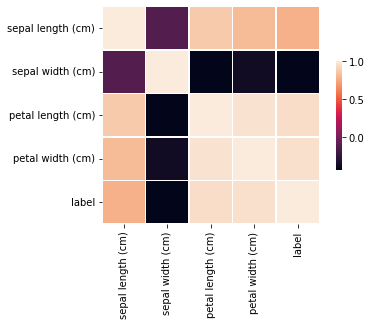

In [ ]:
corelationMatrix = df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corelationMatrix, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Macierz kowariancji często jest mało czytelna. Wygodniejsze do analizy są rozkłady dwuwymiarowe - na osiach rysunku odkładamy dwie wybrane cechy. 
Proszę uruchomić kod w komórce poniżej i zanalizować korelacje między cechami.
Więcej przykładów wyzualizacji można znaleźć [w dokumentacji](https://seaborn.pydata.org/tutorial/axis_grids.html).

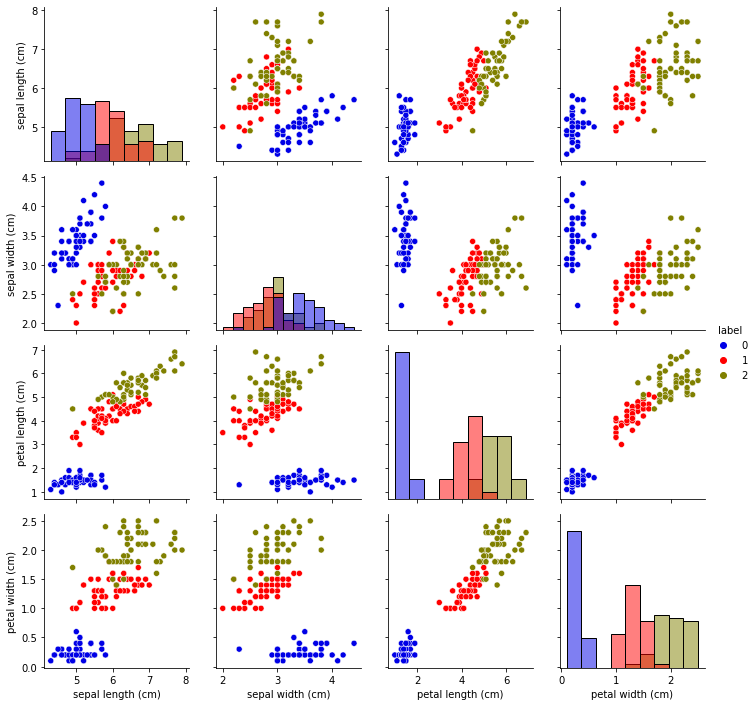

In [ ]:
graph = sns.PairGrid(df, hue="label", palette=color_map)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);
graph.add_legend();

## Przygotowanie danych wejściowych

Aby ułatwić analizę wyniku działania modelu ograniczymy się do dwu cech - wtedy będzie można narysować podział na gatunki na płaszczyźnie.
Znormalizujemy też wartości cech: 

\begin{equation}
x_{norm} = \frac{x - \mu_{x}}{\sigma_{x}}
\end{equation}

* proszę utworzyć dane zawierające znormalizowane kolumny,
* proszę utworzyć dane zawierające tylko wybrane cechy, oraz etykiety: ```["sepal width (cm)","petal length (cm)", "label"]```,
* proszę wypisać zawartość nowych danych.

**Uwaga:** proszę nie normalizować wartości etykiet

In [ ]:
df_normalized =(df-df.mean())/df.std()
df_normalized["label"] = df["label"]

df_subset = df_normalized[["sepal width (cm)","petal length (cm)", "label"]]
print(df_subset)

     sepal width (cm)  petal length (cm)  label
0            1.015602          -1.335752      0
1           -0.131539          -1.335752      0
2            0.327318          -1.392399      0
3            0.097889          -1.279104      0
4            1.245030          -1.335752      0
..                ...                ...    ...
145         -0.131539           0.816859      2
146         -1.278680           0.703564      2
147         -0.131539           0.816859      2
148          0.786174           0.930154      2
149         -0.131539           0.760211      2

[150 rows x 3 columns]


Proszę narysować rozkłady dwuwymiarowe dla nowych danych (danych z dwiema cechami).

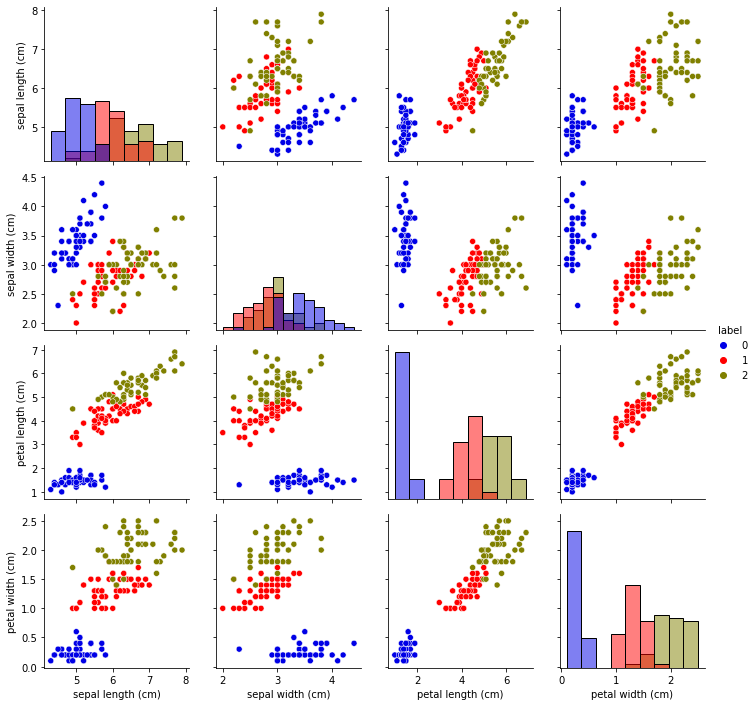

In [ ]:
graph = sns.PairGrid(df, hue="label", palette=color_map)
graph.map_diag(sns.histplot)
graph.map_offdiag(sns.scatterplot);
graph.add_legend();

## Tworzymy i uczymy klasyfikator

Poniżej znajduje się kod służący do klasyfikacji. Proszę go uzupełnić zgodnie z komentarzami i dokumentacją:
[naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) oraz [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

In [ ]:
from sklearn.naive_bayes import GaussianNB
# stwórz instancję klasyfikatora Gaussian Naive Bayes
gnb = GaussianNB()

# wpisz tutaj wartości klas ze zbioru danych
X = df_normalized[['sepal width (cm)', 'petal length (cm)']]
Y = df_normalized['label']
# Dopasuj parametry klasyfikatora 
gnb.fit(X, Y);


* Proszę wypisać parametry dopasowanie: średnie i odchylenia standardowe rozkładów Gaussa. Średnie tych rozkładów znajdują się w polu  ```gnb.theta_```, a wariancje
  w ```gnb.sigma_```,
* prosze wypisać średnie i wariancje rozkładów cech w podziale na gatunki.

**Wskazówka:** proszę skorzystać z grupowania danych: `DataFrame.groupby()`.

Oczekiwany wynik dla parametrów to:
```
Mean:
 [[ 0.85041372 -1.30063009]
 [-0.65922358  0.28437121]
 [-0.19119013  1.01625888]]
Sigma:
 [[0.86093968 0.09738785]
 [0.71270594 0.26351816]
 [0.73246175 0.30949324]]
```

Proszę porównać uzyskane wartości. Czy liczby są zgodne z oczekiwaniami? 

In [ ]:
print("Mean:\n",gnb.theta_)
print("Sigma:\n",np.sqrt(gnb.sigma_))
df_subset_grouped = df_subset.groupby('label') 
df_subset_grouped_sr = df_subset.groupby('label').mean()
df_subset_grouped_odch = df_subset.groupby('label').std(ddof=0)
print(df_subset_grouped.mean())
print(df_subset_grouped.std(ddof=0))

Mean:
 [[ 0.85041372 -1.30063009]
 [-0.65922358  0.28437121]
 [-0.19119013  1.01625888]]
Sigma:
 [[0.86093968 0.09738785]
 [0.71270594 0.26351816]
 [0.73246175 0.30949324]]
       sepal width (cm)  petal length (cm)
label                                     
0              0.850414          -1.300630
1             -0.659224           0.284371
2             -0.191190           1.016259
       sepal width (cm)  petal length (cm)
label                                     
0              0.860940           0.097388
1              0.712706           0.263518
2              0.732462           0.309493


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


#### Porównanie dopasowanych rozkładów z danymi
Komórki poniżej zawierają funkcje:

* ```plot_2d_gaussian(mean, covariance, axis)``` - funkcja która rysuje dwuwymiarowy rozkład Gaussa o średniej ```mean``` i diagonalej macierzy kowariancji ```np.diag(cov)``` na obszarze danymn przez obiekt ```axis```,
* ```plot_2d_divison(model, axis)``` - funkcja która rysuje kontury podziału na klasy na podstawie modelu ```model``` na obszarze danym przez obiekt ```axis```.

In [ ]:
def plot_2d_gaussian(mean, cov, axis):
    xx, yy = np.mgrid[-2:2:0.1, -2:2:0.1]
    pos = np.dstack((xx, yy))
    zz = multivariate_normal.pdf(pos, mean=mean, cov=np.diag(cov))
    axis.contour(xx, yy, zz, 10) 
    
def plot_2d_divison(model, axis):
    xx, yy = np.mgrid[-3:3:0.1, -3:3:0.1]  
    pos = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(pos)
    zz = np.reshape(zz, xx.shape)
    axis.contour(xx, yy, zz, cmap=plt.cm.Paired)

Proszę narysować:

* dwuwymiarowy rozkład danych dla analizowanego zbioru, korzystając z funkcji ```sns.jointplot```. Punkty powinny być pokolorowane według przynależności do gatunku,
* korzystając z funkcji ```plot_2d_gaussian(mean, covariance, axis)``` na tym samym wykresie nanieść rozkłady Gaussa dopasowane przez model ```gnb = GaussianNB()```.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


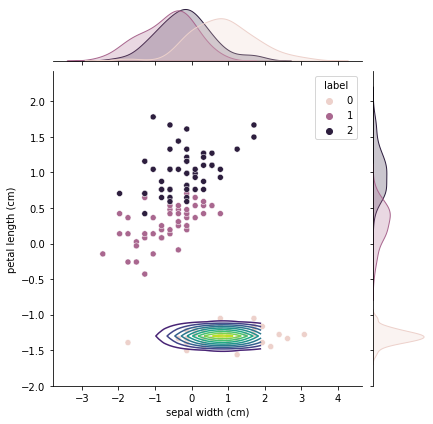

In [ ]:
graph = sns.jointplot(data= df_subset, x= 'sepal width (cm)', y='petal length (cm)', hue="label")
  
classNumber = 0
plot_2d_gaussian(gnb.theta_[classNumber], gnb.sigma_[classNumber], axis=graph.ax_joint)  

Proszę narysować:

* dwuwymiarowy rozkład danych dla analizowanego zbioru, korzystając z funkcji ```sns.jointplot```. Punkty powinny być pokolorowane według przynależności do gatunku,
* korzystając z funkcji ```plot_2d_divison(model, axis)``` na tym samym wykresie nanieść granice podziału na gatunki.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


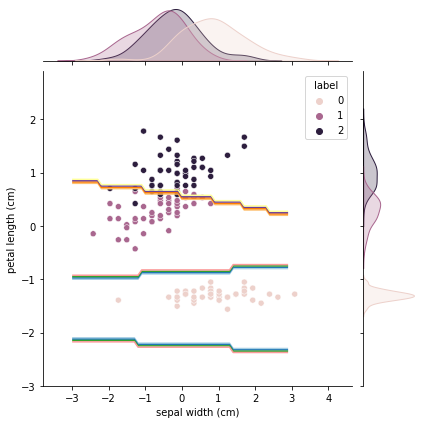

In [ ]:
graph = sns.jointplot(data= df_subset, x= 'sepal width (cm)', y='petal length (cm)', hue="label")

plot_2d_divison(gnb, axis=graph.ax_joint)

## Analiza jakości modelu
Korzystając z walidacji krzyżowej przeprowadzimy analizę miar jakości modeli. Skorzystamy z funkcji dostarczanych przez [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html):
* upewnij się, że dokładnie rozumiesz, co zwracają te funkcje (sprawdź w dokumentacji),
* porównaj z definicjami z [wykładu](https://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wyk%C5%82ad_Ocena_jako%C5%9Bci_klasyfikacji),
* proszę uzupełnić kod funkcji ```printScores(model, X, Y)```, która przyjmuje dopasowany ```model```, cechy ```X``` oraz etykiety ```Y```,
* korzystając z funkcji ```printScores(model, X, Y)``` proszę wypisać wartości miar jakości dla modelu dopasowanego w poprzednich komórkach.

In [ ]:
def printScores(model, X, Y):
    # użyj classification_report() żeby policzyć najpopularniejsze miary 
    print("Classification report:")
    print(classification_report(Y, model.predict(X)))
    # wypisz macierz pomyłek 
    print("Confusion matrix:")
    print(confusion_matrix(Y, model.predict(X)))

X = df_subset[['sepal width (cm)','petal length (cm)']]
Y = df_subset['label']

printScores(gnb, X,Y)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.87        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

Confusion matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  8 42]]


## Porównanie  modeli

Korzystając z kodu napisanego w poprzednich komórkach stwórz trzy modele klasyfikatorów:
* pierwszym niech będzie korzystał z cech ```["sepal width (cm)","petal length (cm)"]``` (nasz dotychczasowy model),
* drugim niech korzysta tylko z cech ```["sepal length (cm)","sepal width (cm)"]```,
* trzeci niech korzysta ze wszytkich czterech cech,
* dla każdego z modeli wypisz wartości miar jakości. Porównaje te wartości między modelami.

In [ ]:
df_subset = df_normalized[["sepal width (cm)","petal length (cm)", "label"]]
gnb_features_1_2 = GaussianNB()
df_subset_grouped = df_subset.groupby('label')
print(df_subset_grouped.mean())
print(df_subset_grouped.std(ddof=0))

       sepal width (cm)  petal length (cm)
label                                     
0              0.850414          -1.300630
1             -0.659224           0.284371
2             -0.191190           1.016259
       sepal width (cm)  petal length (cm)
label                                     
0              0.860940           0.097388
1              0.712706           0.263518
2              0.732462           0.309493


In [ ]:
df_subset = df_normalized[["sepal length (cm)","sepal width (cm)", 'label']]
gnb_features_0_1 = GaussianNB()
df_subset_grouped = df_subset.groupby('label')
print(df_subset_grouped.mean())
print(df_subset_grouped.std(ddof=0))

       sepal length (cm)  sepal width (cm)
label                                     
0              -1.011191          0.850414
1               0.111907         -0.659224
2               0.899284         -0.191190
       sepal length (cm)  sepal width (cm)
label                                     
0               0.421400          0.860940
1               0.617080          0.712706
2               0.760191          0.732462


In [ ]:
df_subset = df_normalized[["sepal width (cm)","petal length (cm)","sepal length (cm)","sepal width (cm)", 'label']]
gnb_features_all = GaussianNB()
df_subset_grouped = df_subset.groupby('label')
print(df_subset_grouped.mean())
print(df_subset_grouped.std(ddof=0))

       sepal width (cm)  petal length (cm)  sepal length (cm)  sepal width (cm)
label                                                                          
0              0.850414          -1.300630          -1.011191          0.850414
1             -0.659224           0.284371           0.111907         -0.659224
2             -0.191190           1.016259           0.899284         -0.191190
       sepal width (cm)  petal length (cm)  sepal length (cm)  sepal width (cm)
label                                                                          
0              0.860940           0.097388           0.421400          0.860940
1              0.712706           0.263518           0.617080          0.712706
2              0.732462           0.309493           0.760191          0.732462


## Analiza wpływu normalizacji danych.

* Proszę wytrenować model na wszytkich cechach, ale korzystając z oryginalnych danych - bez normalizacji wartości cech,
* dla tego modelu proszę wypisać wartości miar jakości.

Czy normalizacja wpływa na wydajność naszego modelu?

In [ ]:
# Stwórz model 4, bez normalizacji danych
df_subset = df[["sepal width (cm)","petal length (cm)","sepal length (cm)","sepal width (cm)", "label"]]
gnb_features_all = GaussianNB()
df_subset_grouped = df_subset.groupby('label')
print(df_subset_grouped.mean())
print(df_subset_grouped.std(ddof=0))
# dofituj parametry klasyfikatora 
gnb_features_all = GaussianNB()
